In [1]:
import pandas as pd
import glob
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from src import utils, cnn

In [2]:
def generate_df(files):
    
    df = pd.DataFrame(columns=['file', 'sample_name', 'data_type', 'outlier'])
    
    for i in range(len(files)):
    
        file = files[i]
        
        sample_name = file.split('\\')[-1].split('_')[0] + '_' + file.split('\\')[-1].split('_')[1]
        
        if 'label' in file:
            data_type = 'mask'
        elif 'distance_field' in file:
            data_type = 'distance_field'
        else:
            data_type = 'image'
        
        if 'sphere_outlier_water' in file:
            outlier = 'sphere_water'
        elif 'sphere_outlier_mean' in file:
            outlier = 'sphere_mean'
        elif 'warp_outlier' in file:
            outlier = 'warp'
        else:
            outlier = 'normal'
            
        df = pd.concat([pd.DataFrame([[file, sample_name, data_type, outlier]], columns=df.columns), df], ignore_index=True)

    return df

def fix_df(df):
    
    df['outlier'] = df['outlier'].astype('category').cat.codes
    df['sample_name_outlier'] = df['sample_name'] + '_' + df['outlier'].astype(str)
    
    samples = np.unique(df['sample_name_outlier'])
    
    new_df = pd.DataFrame(columns=['sample', 'image_file', 'mask_file', 'dist_file', 'outlier'])
    
    for i in range(len(samples)):
    
        sample_df = df[df['sample_name_outlier'] == samples[i]]
        image_file = sample_df[sample_df['data_type'] == 'image']['file'].iloc[0]
        mask_file = sample_df[sample_df['data_type'] == 'mask']['file'].iloc[0]
        dist_file = sample_df[sample_df['data_type'] == 'distance_field']['file'].iloc[0]
    
        outlier = sample_df['outlier'].iloc[0]
        
        new_df = pd.concat([pd.DataFrame([[sample_df['sample_name'].iloc[0], image_file, mask_file, dist_file, outlier]], columns=new_df.columns), new_df], ignore_index=True)

    new_df 
    return new_df

train_files = np.sort(glob.glob('train/**/*.nii.gz'))
test_files = np.sort(glob.glob('test/**/*.nii.gz'))

train_df = generate_df(train_files)
test_df = generate_df(test_files)

train_df = fix_df(train_df)
test_df = fix_df(test_df)

train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

In [3]:
from sklearn.decomposition import PCA

pca_images = []

for i in range(len(train_df)):
        
    image = utils.read_file(train_df.mask_file.iloc[i])

    X = image.reshape((image.shape[0]**2, image.shape[0]))
    X = X - np.mean(X,0)
    std = np.std(X,0)
    X[:,std > 0] = X[:,std > 0] / std[std > 0]
    
    pca = PCA(n_components=1)
    image_pca = pca.fit_transform(X).reshape((image.shape[0], image.shape[0]))
    
    pca_images.append(image_pca)

    if i % 100 == 0:
        print(i, len(train_df))

np.save('train_pca_masks.npy', np.array(pca_images))

0 2184
100 2184
200 2184
300 2184
400 2184
500 2184
600 2184
700 2184
800 2184
900 2184
1000 2184
1100 2184
1200 2184
1300 2184
1400 2184
1500 2184
1600 2184
1700 2184
1800 2184
1900 2184
2000 2184
2100 2184


In [4]:
from sklearn.decomposition import PCA

pca_images = []

for i in range(len(test_df)):
        
    image = utils.read_file(test_df.mask_file.iloc[i])

    X = image.reshape((image.shape[0]**2, image.shape[0]))
    X = X - np.mean(X,0)
    std = np.std(X,0)
    X[:,std > 0] = X[:,std > 0] / std[std > 0]
    
    pca = PCA(n_components=1)
    image_pca = pca.fit_transform(X).reshape((image.shape[0], image.shape[0]))
    
    pca_images.append(image_pca)

    if i % 100 == 0:
        print(i, len(test_df))

np.save('test_pca_masks.npy', np.array(pca_images))

0 547
100 547
200 547
300 547
400 547
500 547


In [5]:
from sklearn.decomposition import PCA

pca_images = []

for i in range(len(train_df)):
        
    image = utils.read_file(train_df.image_file.iloc[i])

    X = image.reshape((image.shape[0]**2, image.shape[0]))
    X = X - np.mean(X,0)
    std = np.std(X,0)
    X[:,std > 0] = X[:,std > 0] / std[std > 0]
    
    pca = PCA(n_components=1)
    image_pca = pca.fit_transform(X).reshape((image.shape[0], image.shape[0]))
    
    pca_images.append(image_pca)

    if i % 100 == 0:
        print(i, len(train_df))

np.save('train_pca_images.npy', np.array(pca_images))

0 2184


C:\Users\Billy\miniconda3\envs\matrix\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Billy\miniconda3\envs\matrix\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


100 2184
200 2184
300 2184
400 2184
500 2184
600 2184
700 2184
800 2184
900 2184
1000 2184
1100 2184
1200 2184
1300 2184
1400 2184
1500 2184
1600 2184
1700 2184
1800 2184
1900 2184
2000 2184
2100 2184


In [6]:
from sklearn.decomposition import PCA

pca_images = []

for i in range(len(test_df)):
        
    image = utils.read_file(test_df.image_file.iloc[i])

    X = image.reshape((image.shape[0]**2, image.shape[0]))
    X = X - np.mean(X,0)
    std = np.std(X,0)
    X[:,std > 0] = X[:,std > 0] / std[std > 0]
    
    pca = PCA(n_components=1)
    image_pca = pca.fit_transform(X).reshape((image.shape[0], image.shape[0]))
    
    pca_images.append(image_pca)

    if i % 100 == 0:
        print(i, len(test_df))

np.save('test_pca_images.npy', np.array(pca_images))

0 547
100 547
200 547
300 547
400 547
500 547


2


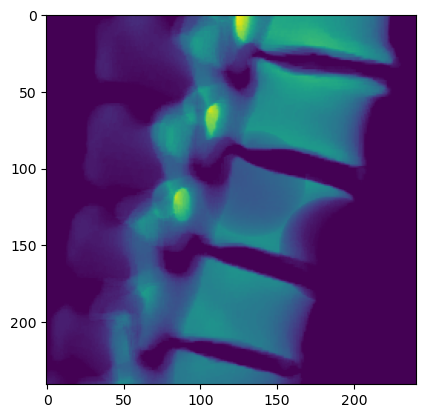

2


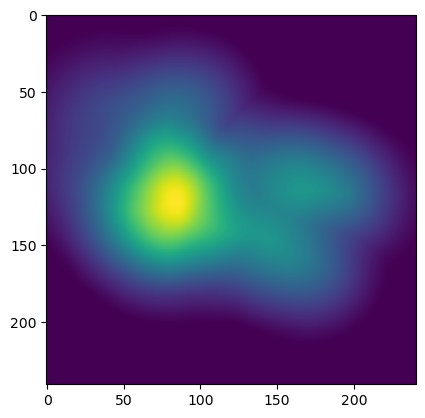

In [17]:
from sklearn.decomposition import PCA

i = 5
    
image = utils.read_file(train_df.mask_file.iloc[i])

X = image.reshape((image.shape[0]**2, image.shape[0]))
X = X - np.mean(X,0)
std = np.std(X,0)

X[:,std > 0] = X[:,std > 0] / std[std > 0]

pca = PCA(n_components=1)
image_pca = pca.fit_transform(X).reshape((image.shape[0], image.shape[0]))

print(train_df.outlier.iloc[i])
plt.imshow(image_pca[:,:])
plt.show()

i = 5
    
image = utils.read_file(train_df.dist_file.iloc[i])

X = image.reshape((image.shape[0]**2, image.shape[0]))
X = X - np.mean(X,0)
std = np.std(X,0)

X[:,std > 0] = X[:,std > 0] / std[std > 0]

pca = PCA(n_components=1)
image_pca = pca.fit_transform(X).reshape((image.shape[0], image.shape[0]))

print(train_df.outlier.iloc[i])
plt.imshow(image_pca[:,:])
plt.show()

1
(241,) (58081, 241)


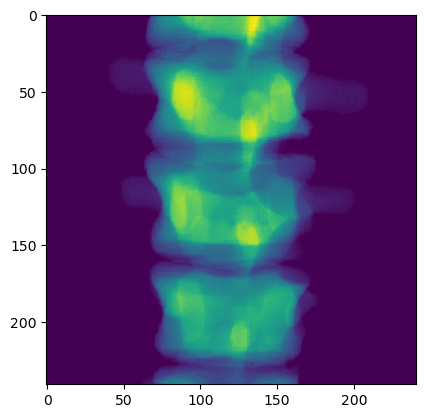

In [14]:
i = 10
print(train_df.outlier.iloc[i])
image = utils.read_file(train_df.mask_file.iloc[i])

from sklearn.decomposition import PCA

image = np.rot90(image, axes=(1,2))
X = image.reshape((image.shape[0]**2, image.shape[0]))
X = X - np.mean(X,0)
std = np.std(X,0)
print(std.shape, X.shape)
X[:,std > 0] = X[:,std > 0] / std[std > 0]

pca = PCA(n_components=3)
image_pca = pca.fit_transform(X).reshape((image.shape[0], image.shape[0], 3))

plt.imshow(image_pca[:,:,0])
plt.show()

